DOing the same as in '/regressiion_torch', this time in tensorflow

In [252]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [253]:
x = tf.Variable([0,1,2,3,4,5,6,7.])
x

<tf.Variable 'Variable:0' shape=(8,) dtype=float32, numpy=array([0., 1., 2., 3., 4., 5., 6., 7.], dtype=float32)>

In [254]:
y = tf.Variable([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37]) # E.g.: Patient's "forgetfulness score"
y

<tf.Variable 'Variable:0' shape=(8,) dtype=float32, numpy=
array([ 1.86,  1.31,  0.62,  0.33,  0.09, -0.67, -1.23, -1.37],
      dtype=float32)>

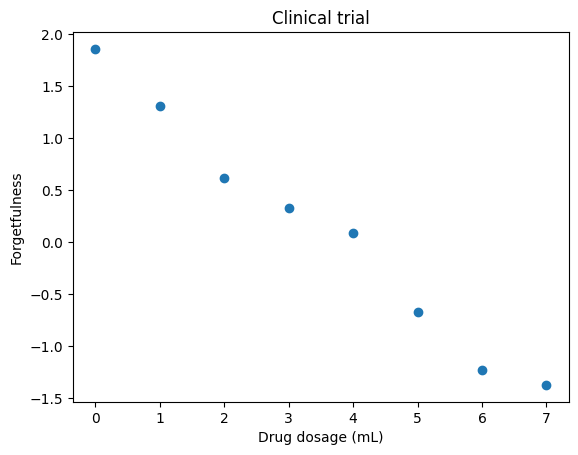

In [255]:
fig , ax = plt.subplots()
plt.title('Clinical trial')
plt.xlabel('Drug dosage (mL)')
plt.ylabel('Forgetfulness')
_ = ax.scatter(x,y)

In [256]:
m = tf.Variable(0.9)
b = tf.Variable(0.1)
m ,b

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.9>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.1>)

In [257]:
def regression(my_x, my_m, my_b):
    return my_m*my_x+b

In [258]:
def regression_plot(my_x, my_y, my_m, my_b):
    fig, ax = plt.subplots()

    ax.scatter(my_x, my_y)
    
    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b).numpy()
    y_max = regression(x_max, my_m, my_b).numpy()
    
    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max])

    print(f"m {m}, b {b}")


m <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.9>, b <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.1>


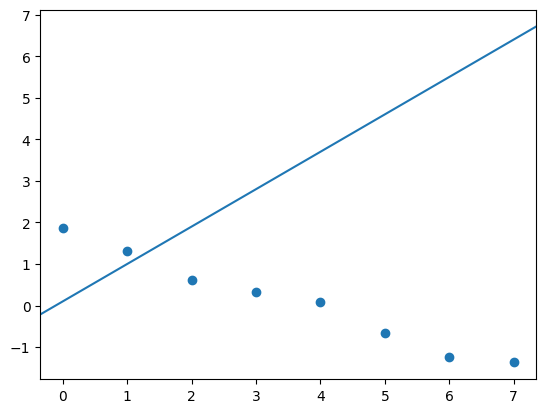

In [259]:
regression_plot(x,y,m,b)

In [278]:
yhat = regression(x , m ,b)

In [282]:
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.01) 


In [285]:
epochs = 1000
lr = 0.01

param_history = {'m': [], 'b': []}
for epoch in range(0, epochs):

    with tf.GradientTape(persistent=True) as tape:
        tape.watch(x)
        tape.watch(m)
        tape.watch(b)
        yhat = m*x + b
        loss =  tf.reduce_sum(tf.square(yhat - y))/8
    dm = tape.gradient(loss, m)
    db = tape.gradient(loss, b)
    # print(f"dm :{dm} , db : {db}")
    
    del tape
    
    # m.assign_sub(lr * dm)
    m = m - (lr*dm)
    # b.assign_sub(lr * db)
    b = b - (lr*dm)

    
    param_history['m'].append(m.numpy())
    param_history['b'].append(b.numpy())
    
    # if i%10==0:
    print('At epoch {}, m={}, b={}'.format(epoch, m.numpy(), b.numpy()))


At epoch 0, m=-0.4200499951839447, b=1.6799499988555908
At epoch 1, m=-0.43167901039123535, b=1.6683210134506226
At epoch 2, m=-0.43842384219169617, b=1.6615761518478394
At epoch 3, m=-0.442335844039917, b=1.657664179801941
At epoch 4, m=-0.4446047842502594, b=1.655395269393921
At epoch 5, m=-0.44592076539993286, b=1.6540793180465698
At epoch 6, m=-0.4466840624809265, b=1.6533160209655762
At epoch 7, m=-0.4471267759799957, b=1.6528732776641846
At epoch 8, m=-0.4473835229873657, b=1.6526165008544922
At epoch 9, m=-0.44753244519233704, b=1.6524676084518433
At epoch 10, m=-0.4476188123226166, b=1.652381181716919
At epoch 11, m=-0.4476689100265503, b=1.6523311138153076
At epoch 12, m=-0.4476979672908783, b=1.6523020267486572
At epoch 13, m=-0.44771480560302734, b=1.6522852182388306
At epoch 14, m=-0.4477245807647705, b=1.6522754430770874
At epoch 15, m=-0.44773027300834656, b=1.652269721031189
At epoch 16, m=-0.4477335512638092, b=1.6522663831710815
At epoch 17, m=-0.447735458612442, b=1.6

In [286]:
m.numpy(), b.numpy()

(-0.44773808, 1.652262)

m -0.44773808121681213, b 1.6522619724273682


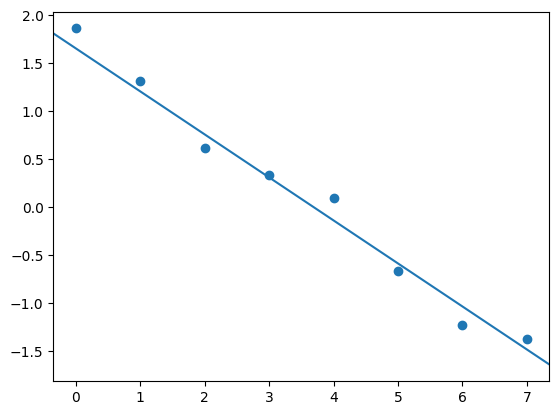

In [287]:
# m=-tf.Variable(0.4)
# b = tf.Variable(1.7)
regression_plot(x,y,m,b)